In [31]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

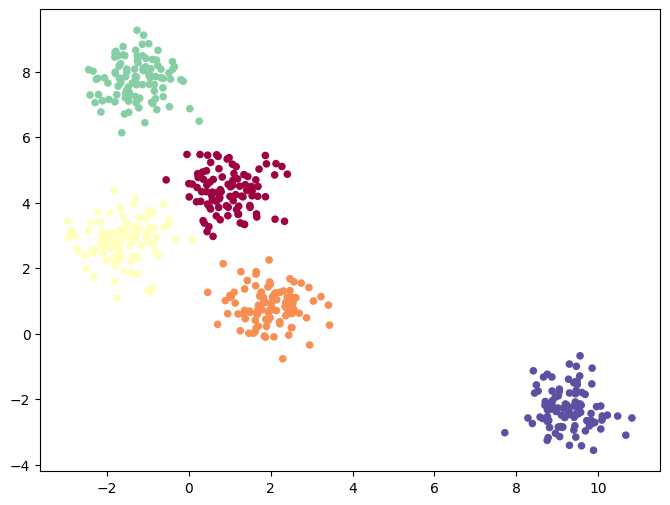

In [32]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

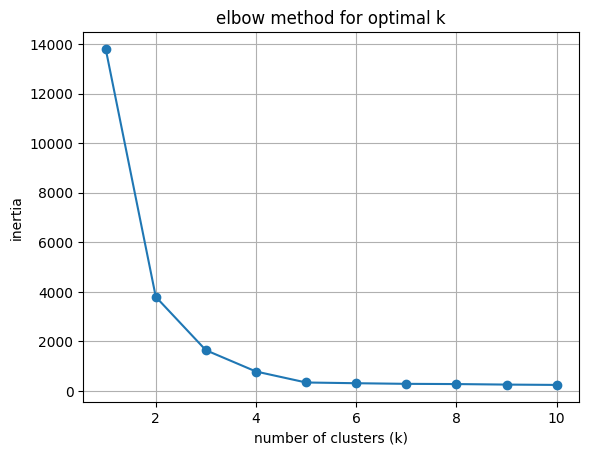

In [33]:

sse = []
range_n =range(1, 11)
for k in range_n:
		km = KMeans(n_clusters=k, random_state=42)
		km.fit(X)
		sse.append(km.inertia_)

plt.plot(range_n, sse, marker='o')
plt.xlabel("number of clusters (k)")
plt.ylabel("inertia")
plt.title("elbow method for optimal k")
plt.grid(True)
plt.show()

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
clf = AgglomerativeClustering(n_clusters=3, linkage= 'ward')
predicted = clf.fit_predict(X_scaled)

Text(0.5, 1.0, 'sklearn agglomerative single linkage')

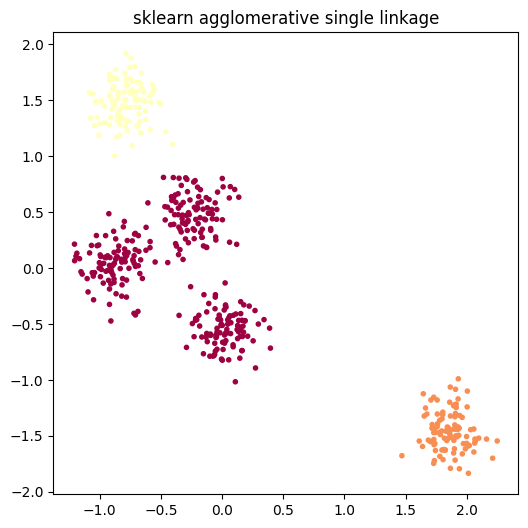

In [36]:

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=colors[predicted], marker= '.') 
plt.title ('sklearn agglomerative single linkage')

Text(0.5, 1.0, 'sklearn agglomerative single linkage')

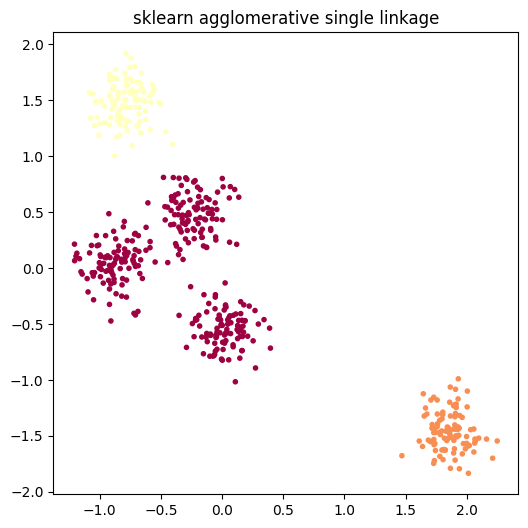

In [37]:
clf = AgglomerativeClustering(n_clusters=3, linkage= 'complete')
predicted = clf.fit_predict(X_scaled)
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=colors[predicted], marker= '.') 
plt.title ('sklearn agglomerative single linkage')

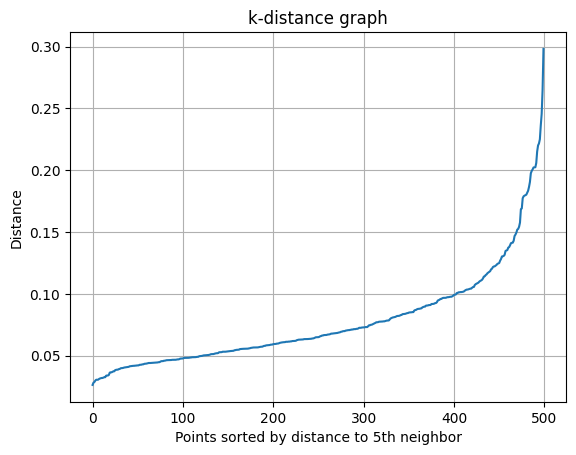

In [38]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance to 5th neighbor")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [39]:
cluster = DBSCAN(eps=0.12, min_samples=2)
predict = cluster.fit_predict(X_scaled)

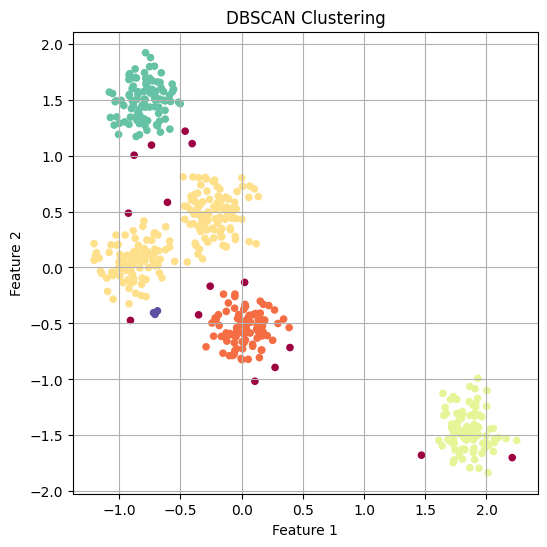

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=predict, cmap='Spectral', s=20)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()